Student Name: Luke Steverango, Student #: 260570652

In [13]:
import random as random
import numpy as np
import operator
import copy
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
def generator(n):
  M = [] #Define the matrix
  for i in range(0, n):
    j = [random.uniform(-1,1) for x in range(0, n)]  #Generate row
    M.append(j) #Add it to the matrix
  return M

def gaussian(M):
  n = len(M[0])
  # Start gaussian elimination

  for i in range(0, n):
  # Search for maximum in this column
    max_el = abs(M[i][i])
    max_row = i
    for k in range(i+1, n):
      if abs(M[k][i]) > max_el:
       max_el = abs(M[k][i])
       max_row = k

  # Swap maximum row with current row (column by column)
  for k in range(i, n):
    tmp = M[max_row][k]
    M[max_row][k] = M[i][k]
    M[i][k] = tmp
    
  for i in range(0, n):
    for j in range(i+1, n):
      factor = M[j][i]/M[i][i]
      temp = [factor * x for x in M[i]] # Creates temp row to subtract
      M[j] = list(map(operator.sub, M[j], temp)) # Performs row subtraction
  # Note: You can fix the really small numbers in the matrix by just replacing them with 0s with the following code:
  for i in range(1, n):
    for j in range(i+1, n):
      M[j][i] = 0.0
  return M

# The following is the code for the growth factor
def growth(M):
  n = len(M[0])
  maxA = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(M[i][j]) > maxA:
        maxA = abs(M[i][j])
  
  A = gaussian(M)
  maxU = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(A[i][j]) > maxU:
        maxU = abs(A[i][j])
  
  return maxU/maxA

To test to see if the above code works we will generate a $5x5$ matrix from it below and then perform Gaussian elimination on it:

In [23]:
E = generator(5)
print(E)
gaussian(E)
print(gaussian(E))

[[-0.3469664247411903, 0.5332974945697333, 0.7871735788487408, -0.8180268441645786, 0.8270343466993748], [-0.1795251972881684, -0.00015462775040187005, 0.48756870429954846, 0.3570440007879152, -0.21159146915341598], [-0.9466198611192664, -0.29282254851826073, -0.60030655344891, -0.854632236118672, 0.9963461289922622], [-0.9284209014004448, -0.26999521511906943, -0.7866275272286294, 0.40056404337932716, 0.7951356674554635], [0.622170768935036, -0.34177656455380023, -0.5274333322096942, 0.2681867769783377, -0.8709155260634001]]
[[-0.3469664247411903, 0.5332974945697333, 0.7871735788487408, -0.8180268441645786, 0.8270343466993748], [0.0, -0.27609008172792165, 0.0802742747354616, 0.7803023339110903, -0.6395104078981269], [0.0, 0.0, -3.2561137502829958, -3.5625807057562935, 2.788427917410521], [0.0, 0.0, 0.0, 1.4983850457714059, -0.38705120621657196], [-3.0814879110195774e-33, 0.0, 0.0, 0.0, -0.06255321252993241]]


A general note, for the Gaussian eliminated matrices there are numbers in this code that appear in the lower triangular part which should be zeros. However, these numbers are really small and are a result of general rounding error. These numbers as a result of their size, won't affect any of the plots since the growth number is taken as the max of the absolute value of all entries in a given matrix in relation to its upper triangular matrix form.

In [26]:
def newMatrix(n):
    M=np.random.uniform(-1,1,(n,n))
    return M

Another note, for the plots of the growth factor in relation to the sizes of matrices, I used this function to make my matrices instead, as the original function took too long for the plots to be produced.

In [27]:
def gaussian(M):
  n = len(M[0])
  # Start gaussian elimination

  for i in range(0, n):
  # Search for maximum in this column
    max_el = abs(M[i][i])
    max_row = i
    for k in range(i+1, n):
      if abs(M[k][i]) > max_el:
       max_el = abs(M[k][i])
       max_row = k

  # Swap maximum row with current row (column by column)
  for k in range(i, n):
    tmp = M[max_row][k]
    M[max_row][k] = M[i][k]
    M[i][k] = tmp
    
  for i in range(0, n):
    for j in range(i+1, n):
      factor = M[j][i]/M[i][i]
      temp = [factor * x for x in M[i]] # Creates temp row to subtract
      M[j] = list(map(operator.sub, M[j], temp)) # Performs row subtraction
  # Note: You can fix the really small numbers in the matrix by just replacing them with 0s with the following code:
  for i in range(1, n):
    for j in range(i+1, n):
      M[j][i] = 0.0
  return M

# Note: You can fix the really small numbers in the matrix by just replacing them with 0s with the following code:
def growth(M):
  n = len(M[0])
  maxA = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(M[i][j]) > maxA:
        maxA = abs(M[i][j])
  
  A = gaussian(M)
  maxU = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(A[i][j]) > maxU:
        maxU = abs(A[i][j])
  
  return maxU/maxA

In [28]:
ListofMatrices = []
for n in range(10, 750, 10):
    ListofMatrices.append(newMatrix(n))

In [ ]:
Factors = []
for x in ListofMatrices:
    Factors.append(growth(x))

These two cells above, create a list of matrices of the respective ranges, and then calculate the growth rates and add them to their own growth rate list. We then plot the corresponding growth rates in relation to their matrix size below in a log plot. 

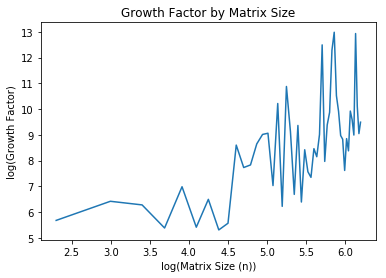

In [6]:
xvalues = np.array(range(10, 500, 10))
yvalues = np.array(Factors)
plt.plot(np.log(xvalues).flatten(), np.log(yvalues))
plt.title('Growth Factor by Matrix Size')
plt.xlabel('log(Matrix Size (n))')
plt.ylabel('log(Growth Factor)')
plt.show()

As we note from the graph, the larger the size, the greater the growth factor. It is approximately like $cn^{\alpha}$ for $\alpha \approx 0.5$ to $0.7$ and $c \in [2,4]$ . One thing to note is that the graph is very noisy. This is probably due to the fact that we are sampling from a uniform distribution, and thus with no skew and equally likely values, the graph has the potential for higher levels of change per matrix when we sample them. Compared to the worst case scenario of $2^n$ this is rather good, as $2^n >> cn^{\alpha}$, for the $c$ and $\alpha$ values chosen. Note, because of the time it takes for the code to run, the graph was done with $500$ as the largest matrix sampled, not $1000$.

Below are samples for matrices of size, $n = 10,20,40$, and $80$. We sample $1000, 750, 400$, and $200$, respectively.

In [105]:
GrowthFactorofMat = []
for x in range(1000):
    GrowthFactorofMat.append(growth(generator(10)))

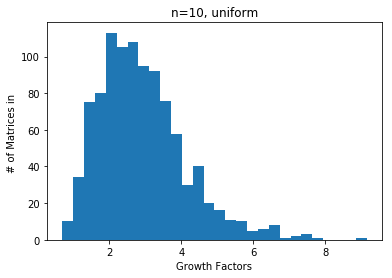

In [106]:
plt.hist(np.log(GrowthFactorofMat),bins='auto')
plt.title('n=10, uniform')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

In [107]:
GrowthFactorofMat = []
for x in range(750):
    GrowthFactorofMat.append(growth(generator(20)))

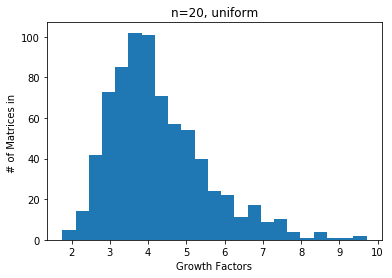

In [108]:
plt.hist(np.log(GrowthFactorofMat),bins='auto')
plt.title('n=20, uniform')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

In [109]:
GrowthFactorofMat = []
for x in range(400):
    GrowthFactorofMat.append(growth(generator(40)))

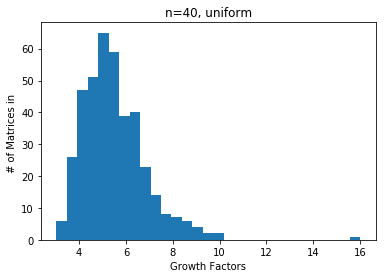

In [110]:
plt.hist(np.log(GrowthFactorofMat),bins='auto')
plt.title('n=40, uniform')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

In [111]:
GrowthFactorofMat = []
for x in range(200):
    GrowthFactorofMat.append(growth(generator(80)))

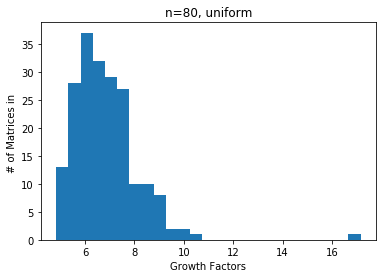

In [112]:
plt.hist(np.log(GrowthFactorofMat),bins='auto')
plt.title('n=80, uniform')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

As can be seen in all $4$ plots, the graphs skew from left to right. However, ignoring the skew they in general look rather bell shaped in appearance. This leads me to believe that it is a right (positive) skew-normal distribution. The distribution is shown to decay rather rapidly meaning the number of high growth factor matrices are small.

We now repeat this whole process for matrices with entries sampled from a normal distribution.

In [29]:
def generatorNormal(n):
  M = [] #Define the matrix
  for i in range(0, n):
    j = [random.normalvariate(0,1) for x in range(0, n)]  #Generate a row
    M.append(j) #Add it to the matrix
  return M

def gaussian(M):
  n = len(M[0])
  # Start gaussian elimination

  for i in range(0, n):
  # Search for maximum in this column
    max_el = abs(M[i][i])
    max_row = i
    for k in range(i+1, n):
      if abs(M[k][i]) > max_el:
       max_el = abs(M[k][i])
       max_row = k

  # Swap maximum row with current row (column by column)
  for k in range(i, n):
    tmp = M[max_row][k]
    M[max_row][k] = M[i][k]
    M[i][k] = tmp
    
  for i in range(0, n):
    for j in range(i+1, n):
      factor = M[j][i]/M[i][i]
      temp = [factor * x for x in M[i]] # Creates temp row to subtract
      M[j] = list(map(operator.sub, M[j], temp)) # Performs row subtraction
  # Note: You can fix the really small numbers in the matrix by just replacing them with 0s with the following code:
  for i in range(1, n):
    for j in range(i+1, n):
      M[j][i] = 0.0
  return M

def growth(M):
  n = len(M[0])
  maxA = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(M[i][j]) > maxA:
        maxA = abs(M[i][j])
  
  A = gaussian(M)
  maxU = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(A[i][j]) > maxU:
        maxU = abs(A[i][j])
  
  return maxU/maxA

We again use the below modified function to create the plot comparing matrix size to growth factor due to how slow the code runs for my other code.

In [3]:
def newMatrixNormal(n):
    M=np.random.normal(0,1,(n,n))
    return M

In [4]:
def gaussian(M):
  n = len(M[0])
  # Start gaussian elimination

  for i in range(0, n):
  # Search for maximum in this column
    max_el = abs(M[i][i])
    max_row = i
    for k in range(i+1, n):
      if abs(M[k][i]) > max_el:
       max_el = abs(M[k][i])
       max_row = k

  # Swap maximum row with current row (column by column)
  for k in range(i, n):
    tmp = M[max_row][k]
    M[max_row][k] = M[i][k]
    M[i][k] = tmp
    
  for i in range(0, n):
    for j in range(i+1, n):
      factor = M[j][i]/M[i][i]
      temp = [factor * x for x in M[i]] # Creates temp row to subtract
      M[j] = list(map(operator.sub, M[j], temp)) # Performs row subtraction
  # Note: You can fix the really small numbers in the matrix by just replacing them with 0s with the following code:
  for i in range(1, n):
    for j in range(i+1, n):
      M[j][i] = 0.0
  return M

def growth(M):
  n = len(M[0])
  maxA = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(M[i][j]) > maxA:
        maxA = abs(M[i][j])
  
  A = gaussian(M)
  maxU = 0.0
  for i in range(0,n):
    for j in range(0,n):
      if abs(A[i][j]) > maxU:
        maxU = abs(A[i][j])
  
  return maxU/maxA

In [6]:
ListofMatricesNormal = []
for n in range(10, 500, 10):
    ListofMatricesNormal.append(newMatrixNormal(n))

In [7]:
FactorsNormal = []
for x in ListofMatricesNormal:
    FactorsNormal.append(growth(x))

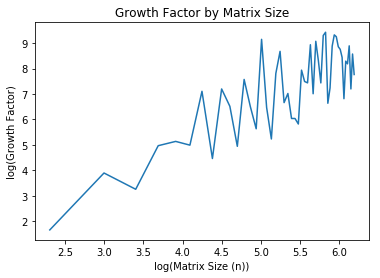

In [8]:
xvalues = np.array(range(10, 500, 10))
yvalues = np.array(FactorsNormal)
plt.plot(np.log(xvalues).flatten(), np.log(yvalues))
plt.title('Growth Factor by Matrix Size')
plt.xlabel('log(Matrix Size (n))')
plt.ylabel('log(Growth Factor)')
plt.show()

We note the for the normal plots, the graph is rather similar with some key differences. It seems to be approximated by a $cn^{\alpha}$ where $\alpha \approx 0.8$ and $c \in [2,3]$. We also note that there is less noise that seems to appear, probably due to the fact that we are sampling from a $N(0,1)$ distribution, so values that are concentrated near $0$ are chosen with higher probability, leading to nicer values for the Gaussian elimination process to work with. We also note, that in comparison to the worst case, $2^n$, $2^n >> cn^{\alpha}$ for $c,\alpha$ chosen above, and thus the time taken is much more favourable in general.

Below we repeat the process of testing for fixed $nxn$ matrices with $n = 10,20,40$, and $80$. We work with samples of $1000, 750, 400$, and $200$ again respectively.

In [4]:
GrowthFactorofMatNormal = []
for x in range(1000):
    GrowthFactorofMatNormal.append(growth(generatorNormal(10)))

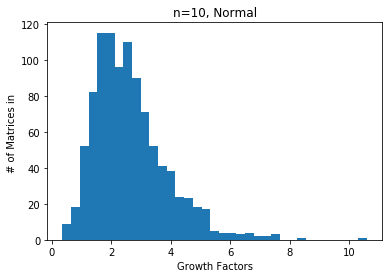

In [5]:
plt.hist(np.log(GrowthFactorofMatNormal),bins='auto')
plt.title('n=10, Normal')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

In [30]:
GrowthFactorofMatNormal = []
for x in range(750):
    GrowthFactorofMatNormal.append(growth(generatorNormal(20)))

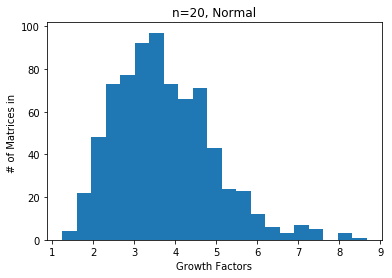

In [31]:
plt.hist(np.log(GrowthFactorofMatNormal),bins='auto')
plt.title('n=20, Normal')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

In [8]:
GrowthFactorofMatNormal = []
for x in range(400):
    GrowthFactorofMatNormal.append(growth(generatorNormal(40)))

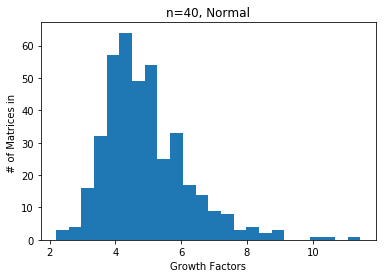

In [9]:
plt.hist(np.log(GrowthFactorofMatNormal),bins='auto')
plt.title('n=40, Normal')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

In [10]:
GrowthFactorofMatNormal = []
for x in range(200):
    GrowthFactorofMatNormal.append(growth(generatorNormal(80)))

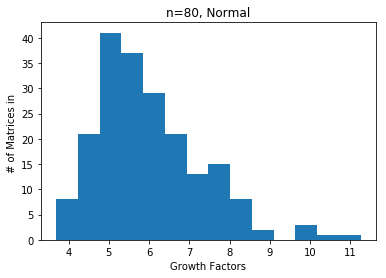

In [11]:
plt.hist(np.log(GrowthFactorofMatNormal),bins='auto')
plt.title('n=80, Normal')
plt.xlabel('Growth Factors')
plt.ylabel('# of Matrices in ')
plt.show()

We note that again the above plots come out very similar to the uniform plots for fixed $nxn$ matrices. They seem to resemble again, right (positive) skew-symmetric normal distributions. The same conclusions above will be drawn here, as it is shown to be that the number of high growth rate matrices is very small.